# Regression and Classification

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

In [2]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files


The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [ ]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

cleveland = pd.read_csv("../data/cleveland.data",names = columns,na_values=['!','?',-9.0])
test = pd.read_csv("../data/switzerland.data",names = columns,na_values=['!','?',-9.0])

In [ ]:
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
3,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0
4,38.0,0.0,4.0,110.0,0.0,0.0,0.0,156.0,0.0,0.0,2.0,NaN,3.0,1.0


In [ ]:
# if you want to see information about the dataset
cleveland.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,296.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.712838,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.938540,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# if you want to see information about the dataset
test.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,122.000000,117.000000,117.000000,117.000000,117.0,46.000000,116.000000,117.000000,117.000000,117.000000,106.000000,5.000000,66.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,0.086957,0.353448,122.299145,0.435897,0.653846,1.801887,1.600000,5.772727,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,0.284885,0.593506,25.759921,0.498007,1.056061,0.623658,0.547723,1.743519,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,105.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,141.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


## *2.* Missing values

C:\Users\srkna\AppData\Local\Temp\ipykernel_11352\1334830944.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(null_values_cleveland.index,rotation=90)
C:\Users\srkna\AppData\Local\Temp\ipykernel_11352\1334830944.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(null_values_test.index,rotation=90)


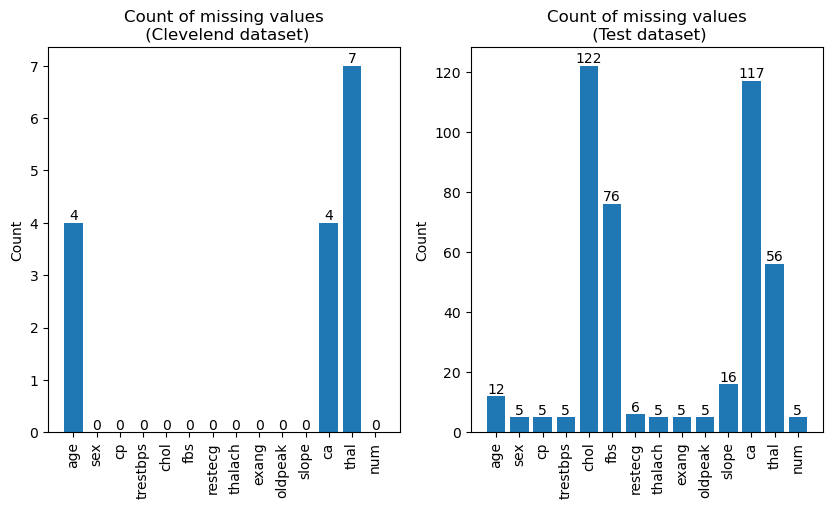

In [ ]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# cleveland.fillna(value=-9.0,inplace=True)
def replace_invalid_with_nan(df):
    # Replace invalid values with NaN according to the expected ranges
    df['age'] = df['age'].mask((df['age'] <= 0) | (df['age'] > 130), np.nan)
    df['sex'] = df['sex'].mask(~df['sex'].isin([0, 1]), np.nan)
    df['cp'] = df['cp'].mask(~df['cp'].isin([1, 2, 3, 4]), np.nan)
    df['trestbps'] = df['trestbps'].mask(df['trestbps'] < 0, np.nan)
    df['chol'] = df['chol'].mask(df['chol'] <= 0, np.nan)
    df['fbs'] = df['fbs'].mask(~df['fbs'].isin([0, 1]), np.nan)
    df['restecg'] = df['restecg'].mask(~df['restecg'].isin([0, 1, 2]), np.nan)
    df['thalach'] = df['thalach'].mask(df['thalach'] < 0, np.nan)
    df['exang'] = df['exang'].mask(~df['exang'].isin([0, 1]), np.nan)
    #df['oldpeak'] = df['oldpeak'].mask(df['oldpeak'] < 0, np.nan) Negitive values can be held for following so not chnaging the column.
    df['slope'] = df['slope'].mask(~df['slope'].isin([1, 2, 3]), np.nan)
    df['ca'] = df['ca'].mask(~df['ca'].isin([0,1,2,3]), np.nan)
    df['thal'] = df['thal'].mask(~df['thal'].isin([3, 6, 7]), np.nan)
    return df

replace_invalid_with_nan(cleveland)

fig, ax = plt.subplots(1,2,figsize = (10,5))
null_values_cleveland = cleveland.isnull().sum()


barplot_1 = ax[0].bar(null_values_cleveland.index,null_values_cleveland)
ax[0].set_title('Count of missing values\n (Clevelend dataset)')
ax[0].set_xticklabels(null_values_cleveland.index,rotation=90)
ax[0].set_ylabel('Count')
ax[0].bar_label(barplot_1)



# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'
replace_invalid_with_nan(test)

null_values_test = test.isnull().sum()

barplot_2 = ax[1].bar(null_values_test.index,null_values_test)
ax[1].set_title('Count of missing values\n (Test dataset)')
ax[1].set_xticklabels(null_values_test.index,rotation=90)
ax[1].set_ylabel('Count')
ax[1].bar_label(barplot_2)

#dropping last 5 rows in test dataset since they donot provide any useful information
test = test.iloc[:-5,:]

## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [ ]:
categorical_columns = ['sex','cp','fbs','restecg','exang','ca','slope','thal','num'] 
numerical_columns_int = ['age','trestbps','thalach']
numerical_columns_float = ['oldpeak'] 

# dropping test['chol']
test.drop(columns=['chol'],inplace=True)
cleveland.drop(columns=['chol'],inplace=True)

cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')
cleveland[numerical_columns_int] = cleveland[numerical_columns_int].astype('Int64')
cleveland[numerical_columns_float] = cleveland[numerical_columns_float].astype('float64')

test[categorical_columns] = test[categorical_columns].astype('object')
test[numerical_columns_int] = test[numerical_columns_int].astype('Int64')
test[numerical_columns_float] = test[numerical_columns_float].astype('float64')




cleveland.dtypes


age           Int64
sex          object
cp           object
trestbps      Int64
fbs          object
restecg      object
thalach       Int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num          object
dtype: object

### ` Splitting the cleveland dataframe in a train and a validation set. `

The size of the validation set is 30% of the total size of the cleveland dataframe. Using shuffle=True and stratify=True. Making sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [10]:
# Split the data into X and y, where X contains the features and y contains the target variable.
X_cleveland = cleveland.iloc[:,:-1]  # change this
y_cleveland = cleveland.iloc[:,-1:]  # change this

X_test = test.iloc[:,:-1]      # change this
y_test = test.iloc[:,-1:]      # change this

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_cleveland,y_cleveland,test_size=0.3,shuffle=True,stratify=y_cleveland,random_state=RSEED)
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)

X_train_cp = X_train.copy()
X_val_cp = X_val.copy()


In [ ]:
X_train.head(5)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,0.0,4.0,180,0.0,1.0,117,1.0,3.4,2.0,0.0,3.0
1,39,0.0,3.0,94,0.0,0.0,179,0.0,0.0,1.0,0.0,3.0
2,62,0.0,3.0,130,0.0,0.0,97,0.0,1.2,2.0,1.0,7.0
3,66,0.0,3.0,146,0.0,2.0,152,0.0,0.0,2.0,1.0,3.0
4,42,1.0,4.0,136,0.0,0.0,125,1.0,1.8,2.0,0.0,6.0


In [ ]:
X_val.head(5)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,<NA>,1.0,4.0,140,0.0,2.0,170,0.0,1.2,2.0,2.0,7.0
1,57,1.0,3.0,150,0.0,0.0,174,0.0,1.6,1.0,0.0,3.0
2,60,0.0,3.0,120,1.0,0.0,96,0.0,0.0,1.0,0.0,3.0
3,68,0.0,3.0,120,0.0,2.0,115,0.0,1.5,2.0,0.0,3.0
4,64,1.0,3.0,140,0.0,0.0,158,0.0,0.0,1.0,0.0,3.0


In [ ]:
# To make the classification task easier, transforming the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.

y_train = y_train.map(lambda x: 0 if x==0 else 1)
y_val = y_val.map(lambda x: 0 if x==0 else 1)
y_test = y_test.map(lambda x: 0 if x==0 else 1)   

y_train_cp = y_train.copy()
y_val_cp = y_val.copy()

### `impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [ ]:
# 1. Creating a subset of the train dataset with only the categorical columns. Calling this subset train_cat.
# 2. Creating a subset of the val dataset with only the categorical columns. Calling this subset val_cat.
# 3. Creating a subset of the test dataset with only the categorical columns. Calling this subset test_cat
# 4. Imputing the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Saving the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer
# making copies of X_train and X_val

cat_columns = ['sex','cp','fbs','restecg','exang','slope','thal','ca']
train_cat = X_train_cp[cat_columns]
val_cat = X_val_cp[cat_columns]
test_cat = X_test[cat_columns]


KNNI = KNNImputer(n_neighbors=5,weights='distance')

imputed_train_cat = KNNI.fit_transform(train_cat)
imputed_val_cat = KNNI.transform(val_cat)
imputed_test_cat = KNNI.transform(test_cat)


train_imputed_knn = pd.DataFrame(imputed_train_cat,columns=cat_columns)  # change this
val_imputed_knn = pd.DataFrame(imputed_val_cat,columns=cat_columns)    # change this
test_imputed_knn = pd.DataFrame(imputed_test_cat,columns=cat_columns)   # change this


originalvalues_dict = {col : sorted(list(train_cat[col].unique())) for col in cat_columns }


train_imputed_knn = train_imputed_knn.astype('float64')
val_imputed_knn = val_imputed_knn.astype('float64')
test_imputed_knn = test_imputed_knn.astype('float64')

def approximation_utility(df, originalvalues_dict):
    for col in cat_columns:
        original_values = originalvalues_dict[col]
        if np.nan in original_values:
            original_values.remove(np.nan)


        for i in range(len(df[col])):
            value = df.at[i,col]
            nearest = min(original_values,key=lambda x: (abs(x-value),-x))
            df.at[i,col] = nearest


    return df

train_imputed_knn = approximation_utility(train_imputed_knn,originalvalues_dict)
val_imputed_knn = approximation_utility(val_imputed_knn,originalvalues_dict)
test_imputed_knn = approximation_utility( test_imputed_knn,originalvalues_dict)


train_imputed_knn =train_imputed_knn.astype('object')
val_imputed_knn = val_imputed_knn.astype('object')
test_imputed_knn = test_imputed_knn.astype('object')




## *4.* Imputing numerical variables

### `impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

After a column has been imputed, it can be used to fit the regressor in the next step.

In [ ]:
# 1. Creating a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Creating a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Creating a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Createing a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Createing a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Createing a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Createing a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Createing a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Createing a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Usinging a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = numerical_columns_int + numerical_columns_float
print(numerical_columns)


train_num = X_train_cp[numerical_columns]
val_num = X_val_cp[numerical_columns]
test_num = X_test[numerical_columns]

train_num = pd.DataFrame(scaler.fit_transform(train_num),columns=numerical_columns)
val_num = pd.DataFrame(scaler.transform(val_num),columns=numerical_columns)
test_num = pd.DataFrame(scaler.transform(test_num),columns=numerical_columns)

def split_missing(df):
    missing_mask = df.isna().any(axis=1)
    return df[missing_mask], df[~missing_mask]

train_num_missing, train_num_not_missing = split_missing(train_num)
val_num_missing, val_num_not_missing = split_missing(val_num)
test_num_missing, test_num_not_missing = split_missing(test_num)

def impute_missing_with_lasso(df_missing, df_not_missing):
    imputed_df = df_missing.copy()
    
    # Get the columns with missing values and sort them by the number of missing values
    missing_counts = df_missing.isnull().sum().sort_values()
    #print(missing_counts,type(missing_counts))

    for col in missing_counts.index:
        if missing_counts[col] > 0:

            #print(col+"\n")
            # Dropping target variable
            X_missing = imputed_df.drop(columns=[col])
            #print(X_missing)
            X_missing = X_missing.dropna(axis = 1)
            #print(X_missing,"After colums ignore")

            X_train_lasso = df_not_missing[X_missing.columns]
            y_train_lasso = df_not_missing[col]

            lasso = Lasso(alpha=0.1,random_state=RSEED)
            lasso.fit(X_train_lasso, y_train_lasso)

            imputed_values = lasso.predict(X_missing)
            imputed_df[col] = imputed_values
            

    return imputed_df

train_num_imputed_lasso = impute_missing_with_lasso(train_num_missing, train_num_not_missing)
val_num_imputed_lasso = impute_missing_with_lasso(val_num_missing, train_num_not_missing)
test_num_imputed_lasso = impute_missing_with_lasso(test_num_missing, train_num_not_missing)




# Step 10: Concatenate the imputed and non-missing subsets
train_imputed_lasso = pd.concat([train_num_not_missing, train_num_imputed_lasso]).sort_index()
val_imputed_lasso = pd.concat([val_num_not_missing, val_num_imputed_lasso]).sort_index()
test_imputed_lasso = pd.concat([test_num_not_missing, test_num_imputed_lasso]).sort_index()

'''
train_imputed_lasso = pd.DataFrame()  # change this
val_imputed_lasso = pd.DataFrame()    # change this
test_imputed_lasso = pd.DataFrame()   # change this

'''
for col in numerical_columns_int:
    train_imputed_lasso[col] = train_imputed_lasso[col].astype('int64')
    val_imputed_lasso[col] = val_imputed_lasso[col].astype('int64')
    test_imputed_lasso[col] = test_imputed_lasso[col].astype('int64')


['age', 'trestbps', 'thalach', 'oldpeak']


## *5.* Classification with Decision Tree, using a single split 

In [ ]:
# Mergeing the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Mergeing the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Mergeing the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

X_train_imputed = pd.concat([train_imputed_knn,train_imputed_lasso],axis=1)  # change this
X_val_imputed = pd.concat([val_imputed_knn,val_imputed_lasso],axis=1)    # change this
X_test_imputed = pd.concat([test_imputed_knn,test_imputed_lasso],axis=1)   # change this


### `Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Creating a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Creating a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Creating a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Creating a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier as DT

from sklearn.metrics import f1_score
import time

hyperparameters = {

    'criterion' : ['gini','entropy'],
    'max_depth' : [3,5,7],
    'min_samples_split' : [2,5,10]

} # change this
# add missing steps here

performance = dict()

ParameterGrid_obj = ParameterGrid(hyperparameters)

start = time.time() # DO NOT CHANGE/DELETE THIS LINE

    # Add the missing steps here.
for parameter_tree_combination in ParameterGrid_obj:
    tree = DT(**parameter_tree_combination,random_state=RSEED)
    tree.fit(X_train_imputed, y_train_cp)
    y_tree = tree.predict(X_val_imputed)
    performance[frozenset(parameter_tree_combination.items())] =  f1_score(y_val_cp, y_tree, average='macro')

end = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

Time elapsed to run the hyperparameter tuning with a single split:  0.16333913803100586


In [22]:
# select the best performing hyperparameters
best_score = max(performance.values())

best_hyperparameters = dict() # change this
BHFS = None

for key,val in performance.items():
    if val == best_score:
        BHFS = key

for i,j in BHFS:
    best_hyperparameters[i] = j

best_hyperparameters


{'max_depth': 3, 'min_samples_split': 10, 'criterion': 'entropy'}

In [ ]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.concat([X_train_imputed,X_val_imputed],axis=0).reset_index(drop=True)  # change this
y = pd.concat([y_train_cp,y_val_cp]).reset_index(drop=True) # change this



# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
tree_DT = DT(**best_hyperparameters,random_state=RSEED)
tree_DT.fit(X,y)

# Predict the target variable for the test dataset.

y_tree_test = tree_DT.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.


f1_test_single_split = f1_score(y_test, y_tree_test, average='macro')

In [ ]:
f1_test_single_split

0.5464465183058148

## *6.* Classification with Decision Tree using Cross Validation

### `Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

CV = StratifiedKFold(n_splits=5,shuffle=True,random_state=RSEED) # change this

hyperparameters = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,5,7],
    'min_samples_split' : [2,5,10]
    
}

performance_CV = dict()

ParameterGrid_CV = ParameterGrid(hyperparameters)


start_CV = time.time()

for i, (train_index, val_index) in enumerate(CV.split(X_train_imputed, y_train)):
    X_train_CV, X_val_CV = X_train_imputed.iloc[train_index], X_train_imputed.iloc[val_index]
    y_train_CV, y_val_CV = y_train.iloc[train_index], y_train.iloc[val_index]
    for parameter_tree_combination_CV in ParameterGrid_CV: # change this
        # Add the missing steps here.
        tree_CV = DT(**parameter_tree_combination_CV,random_state=RSEED)
        tree_CV.fit(X_train_CV,y_train_CV)
        y_predict = tree_CV.predict(X_val_CV)
        f1_CV = f1_score(y_val_CV,y_predict,average='macro')
        if performance_CV.get(frozenset(parameter_tree_combination_CV.items()),0) == 0:
            performance_CV[frozenset(parameter_tree_combination_CV.items())] = []
            performance_CV[frozenset(parameter_tree_combination_CV.items())].append(f1_CV)
            continue
        performance_CV[frozenset(parameter_tree_combination_CV.items())].append(f1_CV)
        

end_CV = time.time()

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) # DO NOT CHANGE/DELETE THIS LINE


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.8319990634918213


In [ ]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
# select the best performing hyperparameters
#print(performance_CV)


performance_CV_with_avg = dict()
for key,val in performance_CV.items():
    performance_CV_with_avg[key] = sum(val)/len(val)

best_score_CV = max(performance_CV_with_avg.values())

best_hyperparameters_CV = dict()
BHFS = None

for key,val in performance_CV_with_avg.items():
    if val == best_score_CV:
        BHFS = key

for i,j in BHFS:
    best_hyperparameters_CV[i] = j

best_hyperparameters_CV

{'criterion': 'gini', 'min_samples_split': 10, 'max_depth': 3}

In [ ]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

final_tree = DT(**best_hyperparameters_CV,random_state=RSEED)

# Predict the target variable for the test dataset.

final_tree.fit(X,y)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.
y_best_tree_predicted = final_tree.predict(X_test_imputed)

f1_test_CV = f1_score(y_best_tree_predicted,y_test,average="macro") # change this

In [28]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

0.5464465183058148

## *7.* Interpretation of the results 

### `Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

From the observations, the cross validation strategy takes more time in training the model. This happens because in cross validation the entire training set is split into k sets. k-1 sets are used for training and kth set is used for validation and this is repeated for k folds. Whereas in single split training of model takes place only once.

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

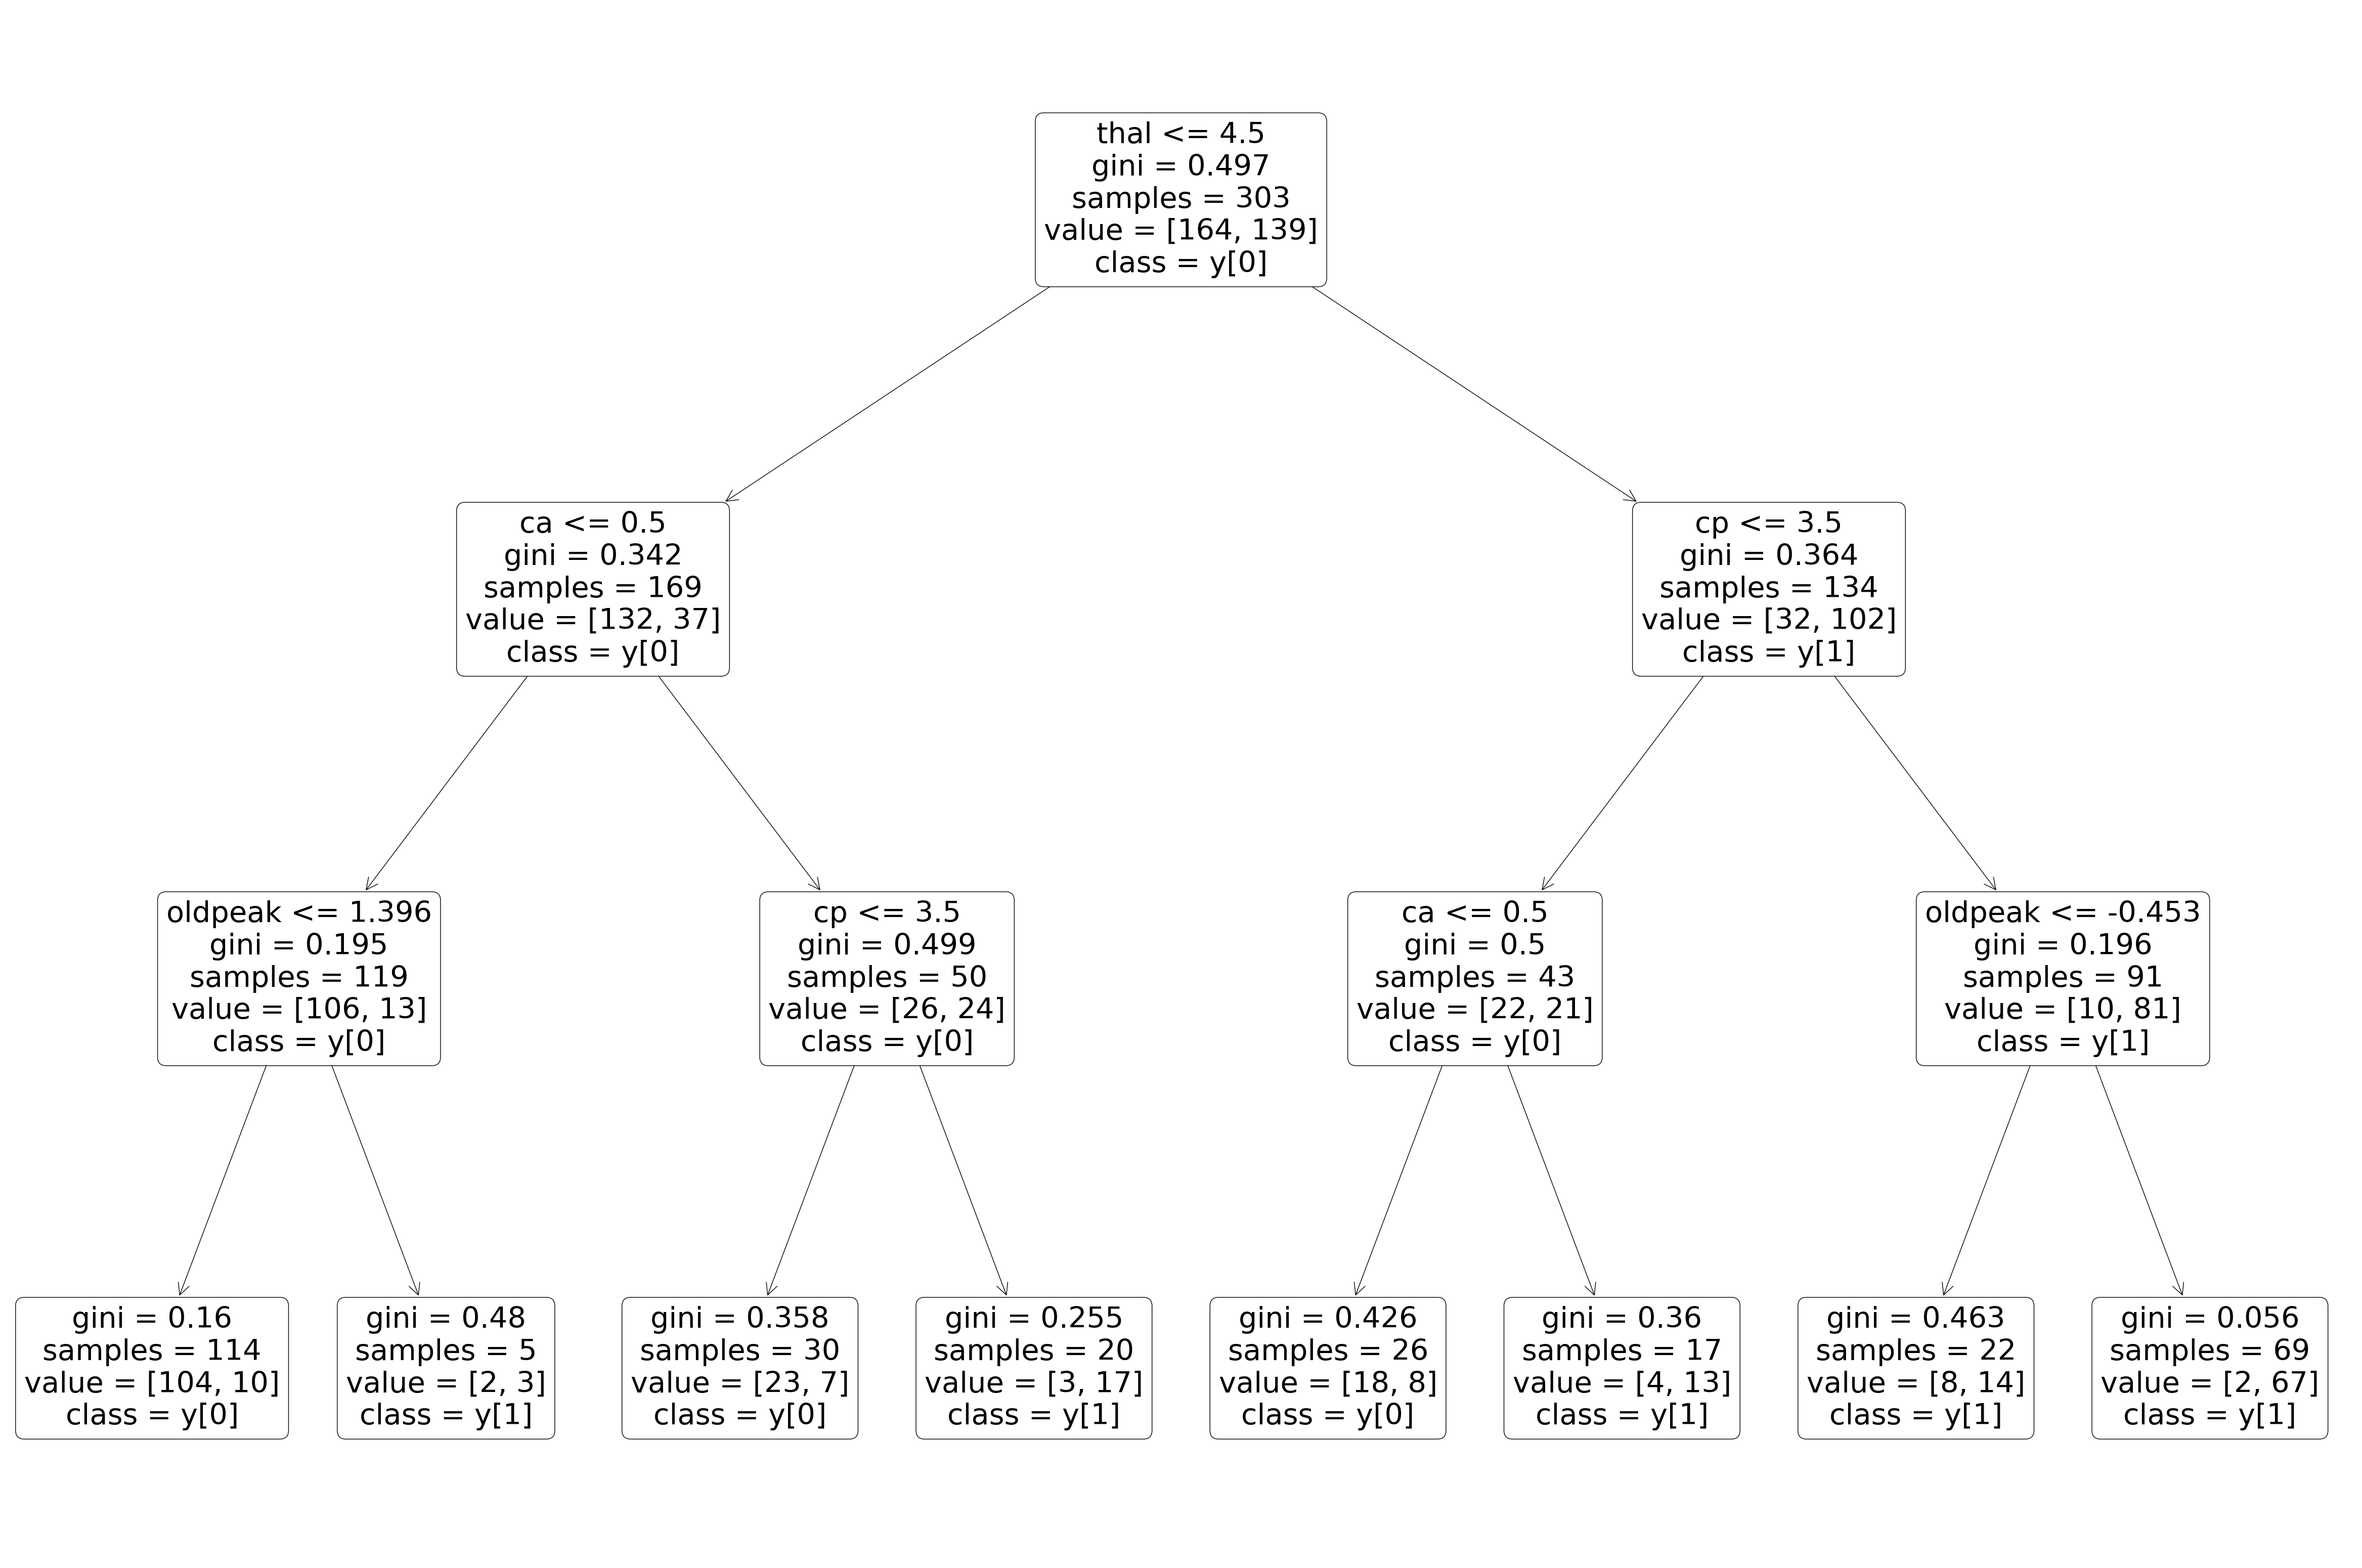

In [29]:
# plot your tree here.
from sklearn.tree import plot_tree

plt.figure(figsize=(60,40))

plot_tree(final_tree,feature_names=X.columns,class_names=True,rounded=True)
plt.show()




From the image of tree, 'thal' is the feature at the root node used for splitting, indicating it as the most informative feature. Other features like 'ca', 'cp' and 'Oldpeak' at deeper layers, further split the data to create more homogeneous groups.